### EDA_Velocidad % por prov.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Distribución porcentual de la velocidad de conexión a internet por provincia, permitiendo analizar el acceso a diferentes velocidades en distintas partes del país.

### Objetivo del Análisis
El propósito de este análisis es **estudiar la variabilidad de velocidades de conexión en cada provincia**, identificando 
regiones con mejor o peor acceso a internet de alta velocidad.


In [38]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Velocidad % por prov.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   int64  
 4   Incremento_Velocidad    984 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 39.5+ KB
None


In [40]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)', 'Incremento_Velocidad']


In [41]:
# Convertir la columna "Año" a datetime y luego extraer el año como entero
df['Año'] = pd.to_datetime(df['Año']).dt.year
print("La columna 'Año' ha sido convertida a tipo int.")
print(df.dtypes)

La columna 'Año' ha sido convertida a tipo int.
Año                         int32
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)      int64
Incremento_Velocidad      float64
dtype: object


In [42]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int32  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   int64  
 4   Incremento_Velocidad    984 non-null    float64
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 35.6+ KB
None


In [43]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [44]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA',
        'CAPITAL FEDERAL': 'CABA',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.


In [45]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [46]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [47]:
import sweetviz as sv
from skimpy import skim

In [48]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int32  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   int64  
 4   Incremento_Velocidad    984 non-null    float64
 5   Trimestre_Label         1008 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 43.4+ KB
None
    Año  Trimestre     Provincia  Mbps (Media de bajada)  \
0  1970          2  BUENOS AIRES                     157   
1  1970          2          CABA                     233   
2  1970          2     CATAMARCA                      97   
3  1970          2         CHACO                     107   
4  1970          2        CHUBUT                      21   

   Incremento_Velocidad Trimest

In [49]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1008   │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column               ┃ NA ┃ NA %              ┃ mean   ┃ sd    ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Año                  │  0 │                 0 │   1970 │     0 │ 1970 │ 1970 │ 1970 │ 1970 │ 1970 │     ▇  │  │
│ │ Trimestre            │  0 │                 0 │  2.452 │ 1.118 │    1 │    1 │    2 │    3 │    4 │ ▇ ▇ ▇▇ │  │
│ │ Mbps (Media de       │  0 │                 0 │  24.22 │ 33.67 │    2 │    4 │   10 │   29 │  234 │  ▇▁▁   │  │
│ │ bajada)              │    │                   │        │       │      │      │      │      │      │        │  │
│ │ Incremento_Velocidad │ 24 │ 2.380952380952381 │ -2.057 │ 6.505 │  -81 │   -2 │   -1 │    0 │    5 │      ▇ │  │
│ └──────────────────────┴────┴───────────────────┴────────┴───────┴──────┴──────┴──────┴──────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃           ┃         ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min       ┃ max     ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Provincia  │  0 │    0 │ CABA     │ SANTIAGO   │ BUENOS    │ TUCUMÁN │       8.46 │       1.5 │       1554 │  │
│ │            │    │      │          │ DEL ESTERO │ AIRES     │         │            │           │            │  │
│ │ Trimestre_ │  0 │    0 │ Q2       │ Q2         │ Q1        │ Q4      │          2 │         1 │       1008 │  │
│ │ Label      │    │      │          │            │           │         │            │           │            │  │
│ └────────────┴────┴──────┴──────────┴────────────┴───────────┴─────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
           Año    Trimestre     Provincia  Mbps (Media de bajada)  \
count   1008.0  1008.000000          1008             1008.000000   
unique     NaN          NaN            24                     NaN   
top        NaN          NaN  BUENOS AIRES                     NaN   
freq       NaN          NaN            42                     NaN   
mean    1970.0     2.452381           NaN               24.222222   
std        0.0     1.117574           NaN               33.666131   
min     1970.0     1.000000           NaN                2.000000   
25%     1970.0     1.000000           NaN                4.000000   
50%     1970.0     2.000000           NaN               10.000000   
75%     1970.0     3.000000           NaN               29.000000   
max     1970.0     4.000000           NaN              234.000000   

        Incremento_Velocidad Trimestre_Label  
count             984.000000            1008  
uni

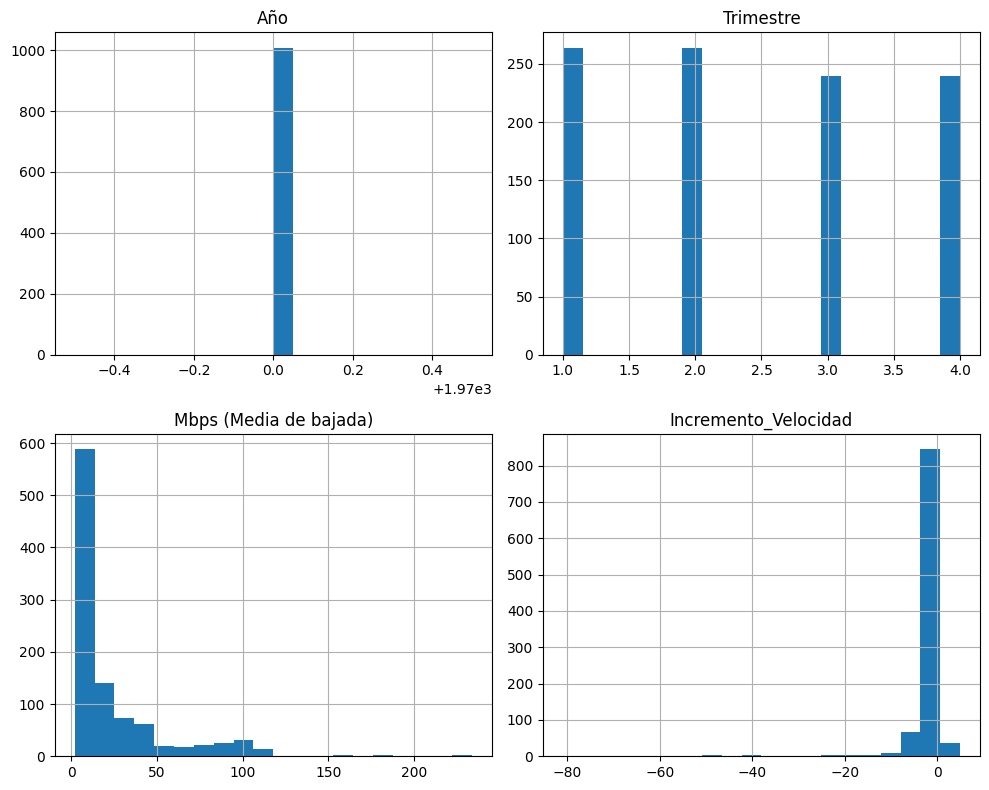

In [50]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                        Año  Trimestre  Mbps (Media de bajada)  \
Año                     NaN        NaN                     NaN   
Trimestre               NaN   1.000000               -0.005182   
Mbps (Media de bajada)  NaN  -0.005182                1.000000   
Incremento_Velocidad    NaN  -0.035473               -0.260318   

                        Incremento_Velocidad  
Año                                      NaN  
Trimestre                          -0.035473  
Mbps (Media de bajada)             -0.260318  
Incremento_Velocidad                1.000000  


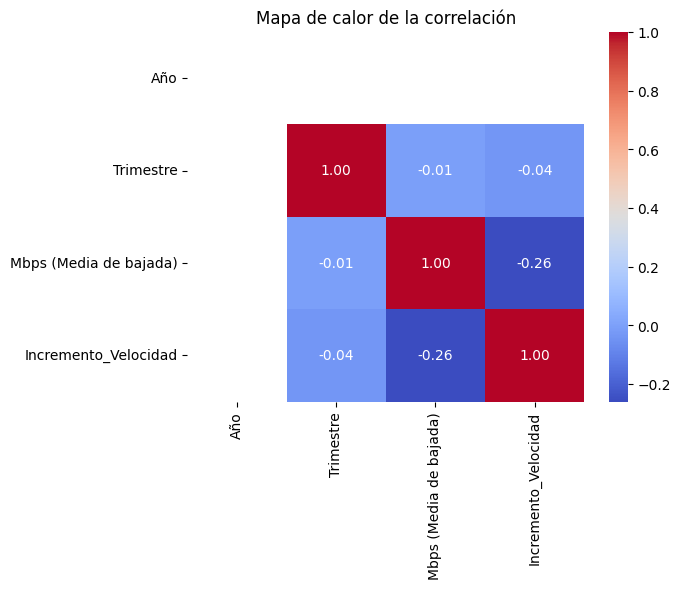

In [51]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [52]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4
Provincia                          
BUENOS AIRES         11  11  10  10
CABA                 11  11  10  10
CATAMARCA            11  11  10  10
CHACO                11  11  10  10
CHUBUT               11  11  10  10
CORRIENTES           11  11  10  10
CÓRDOBA              11  11  10  10
ENTRE RÍOS           11  11  10  10
FORMOSA              11  11  10  10
JUJUY                11  11  10  10
LA PAMPA             11  11  10  10
LA RIOJA             11  11  10  10
MENDOZA              11  11  10  10
MISIONES             11  11  10  10
NEUQUÉN              11  11  10  10
RÍO NEGRO            11  11  10  10
SALTA                11  11  10  10
SAN JUAN             11  11  10  10
SAN LUIS             11  11  10  10
SANTA CRUZ           11  11  10  10
SANTA FE             11  11  10  10
SANTIAGO DEL ESTERO  11  11  10  10
TIERRA DEL FUEGO     11  11  10  10
TUCUMÁN              11  11  10  10
Tabla d

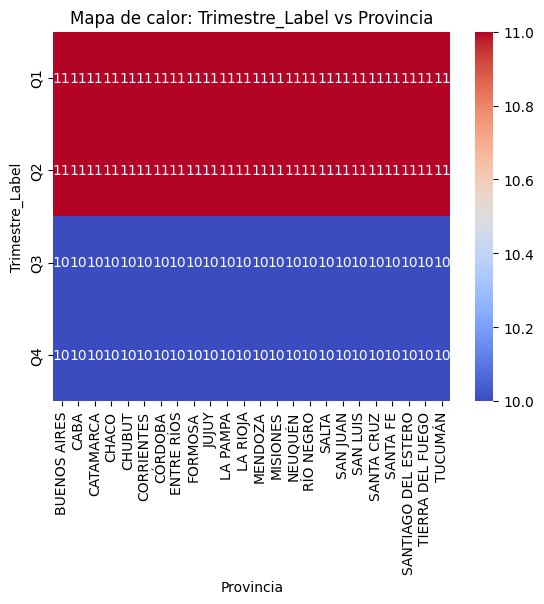

In [53]:
# Visualizar una tabla de contingencia específica como mapa de calor
tabla_contingencia = pd.crosstab(df['Trimestre_Label'], df['Provincia'])
sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
plt.title("Mapa de calor: Trimestre_Label vs Provincia")
plt.show()


In [54]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
      Año  Trimestre  Mbps (Media de bajada)  Incremento_Velocidad
0     NaN  -0.404989                3.945915                   NaN
1     NaN  -0.404989                6.204497                   NaN
2     NaN  -0.404989                2.162824                   NaN
3     NaN  -0.404989                2.460006                   NaN
4     NaN  -0.404989               -0.095759                   NaN
...   ...        ...                     ...                   ...
1003  NaN  -1.300229               -0.630686                   NaN
1004  NaN  -1.300229               -0.630686                   NaN
1005  NaN  -1.300229               -0.660404                   NaN
1006  NaN  -1.300229               -0.630686                   NaN
1007  NaN  -1.300229               -0.630686                   NaN

[1008 rows x 4 columns]


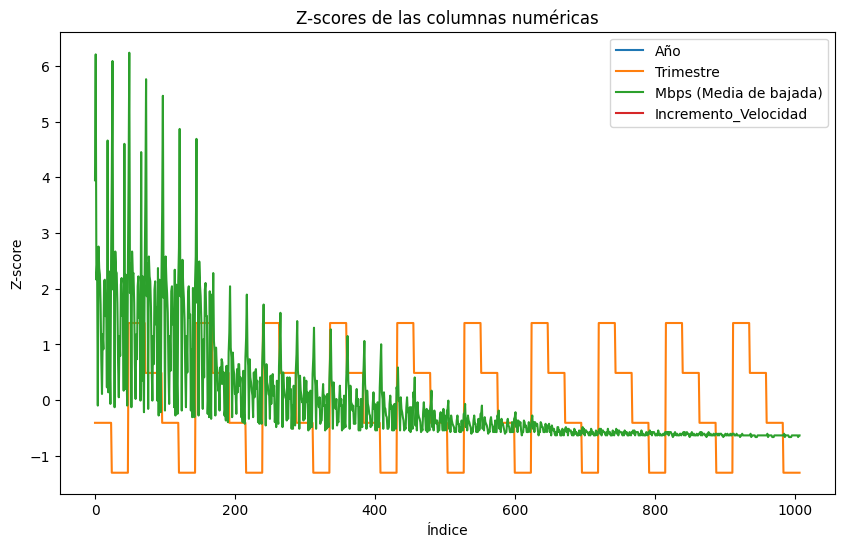

In [55]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [56]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           42
CABA                   42
CATAMARCA              42
CHACO                  42
CHUBUT                 42
CÓRDOBA                42
CORRIENTES             42
ENTRE RÍOS             42
FORMOSA                42
JUJUY                  42
LA PAMPA               42
LA RIOJA               42
MENDOZA                42
MISIONES               42
NEUQUÉN                42
RÍO NEGRO              42
SALTA                  42
SAN JUAN               42
SAN LUIS               42
SANTA CRUZ             42
SANTA FE               42
SANTIAGO DEL ESTERO    42
TIERRA DEL FUEGO       42
TUCUMÁN                42
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2    264
Q1    264
Q4    240
Q3    240
Name: count, dtype: int64


In [57]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index(['Incremento_Velocidad'], dtype='object')


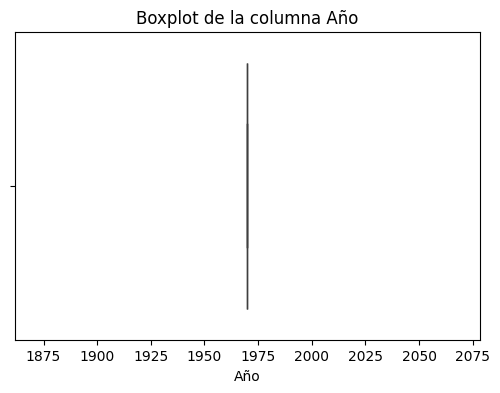

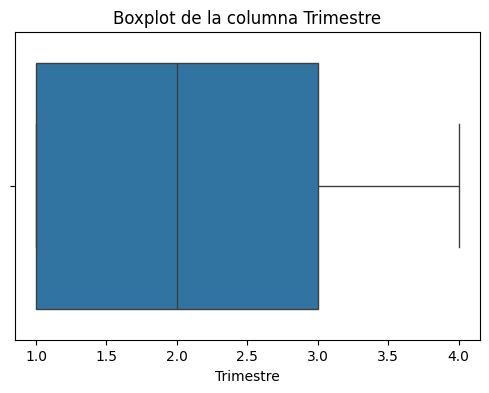

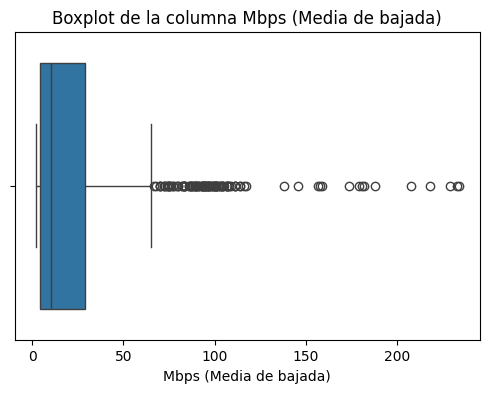

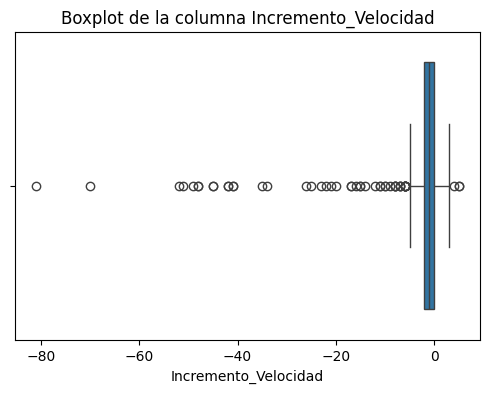

In [58]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [59]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                        0
Trimestre                  0
Provincia                  0
Mbps (Media de bajada)     0
Incremento_Velocidad      24
Trimestre_Label            0
dtype: int64


In [60]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Velocidad % por prov.csv


In [61]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año                       0.000000
Trimestre                 0.068279
Mbps (Media de bajada)    2.638013
Incremento_Velocidad     -6.993719
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año                        0.000000
Trimestre                 -1.354076
Mbps (Media de bajada)     8.756670
Incremento_Velocidad      57.619817
dtype: float64


In [62]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
                 Variable       VIF
0                     Año  6.359363
1               Trimestre  1.001456
2  Mbps (Media de bajada)  1.062206
3    Incremento_Velocidad  1.063511


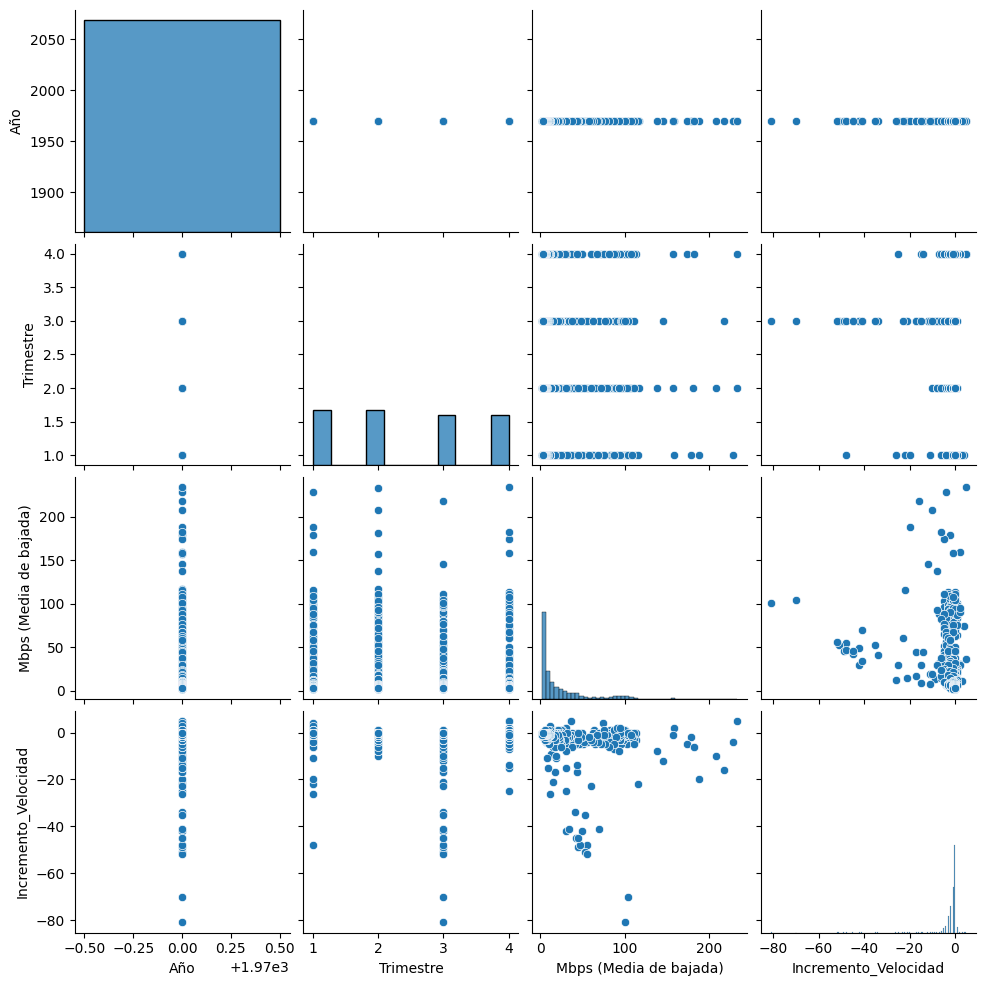

In [63]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [64]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                      Año                                               \
                    count    mean  std     min     25%     50%     75%   
Provincia                                                                
BUENOS AIRES         42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CABA                 42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CATAMARCA            42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CHACO                42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CHUBUT               42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CORRIENTES           42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
CÓRDOBA              42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
ENTRE RÍOS           42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
FORMOSA              42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0   
JUJUY                42.0  1970.0  0.0  1970.0  1970.0  1970.0  1970.0  

In [65]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
98


In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int32  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   int64  
 4   Incremento_Velocidad    984 non-null    float64
 5   Trimestre_Label         1008 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 43.4+ KB
None


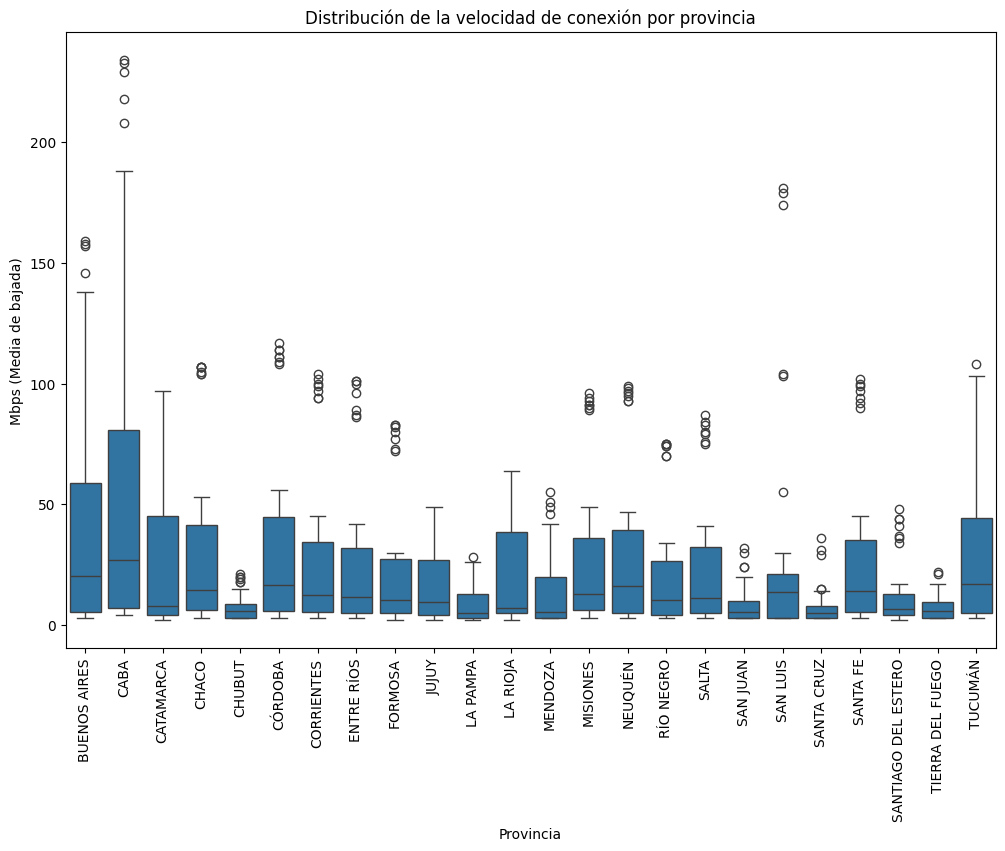

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de la velocidad de conexión por provincia')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14416\459871546.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=df, ci=None)


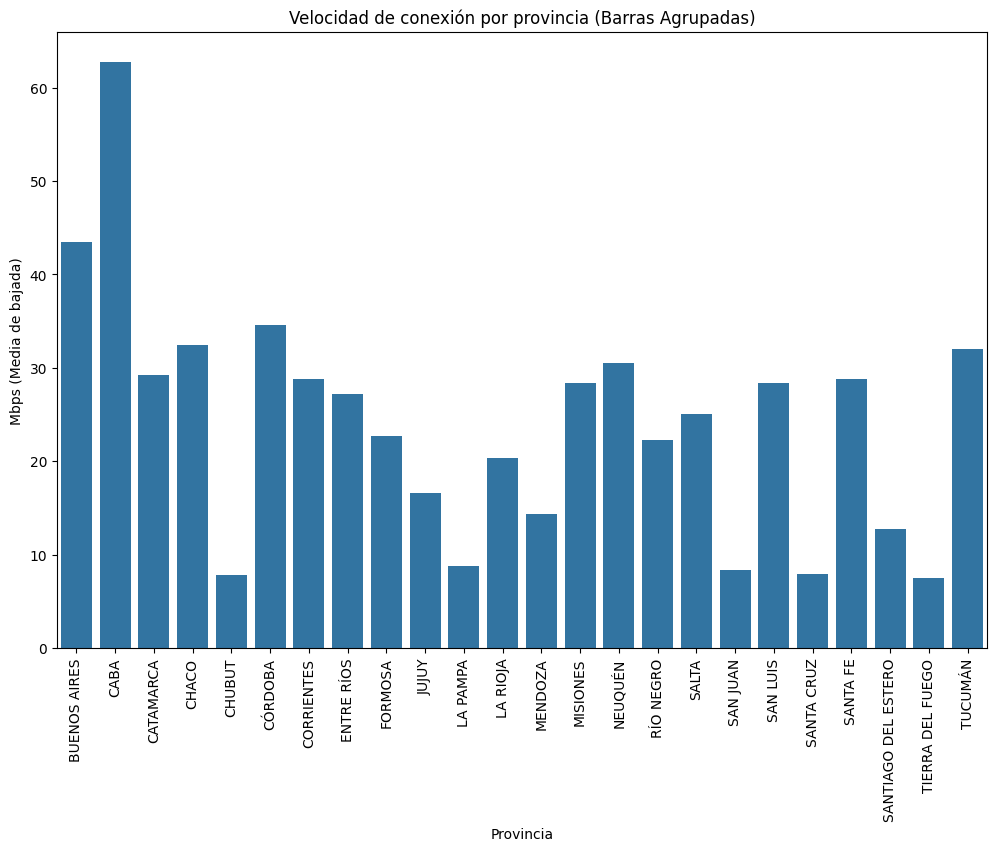

In [68]:
# Gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('Velocidad de conexión por provincia (Barras Agrupadas)')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.show()

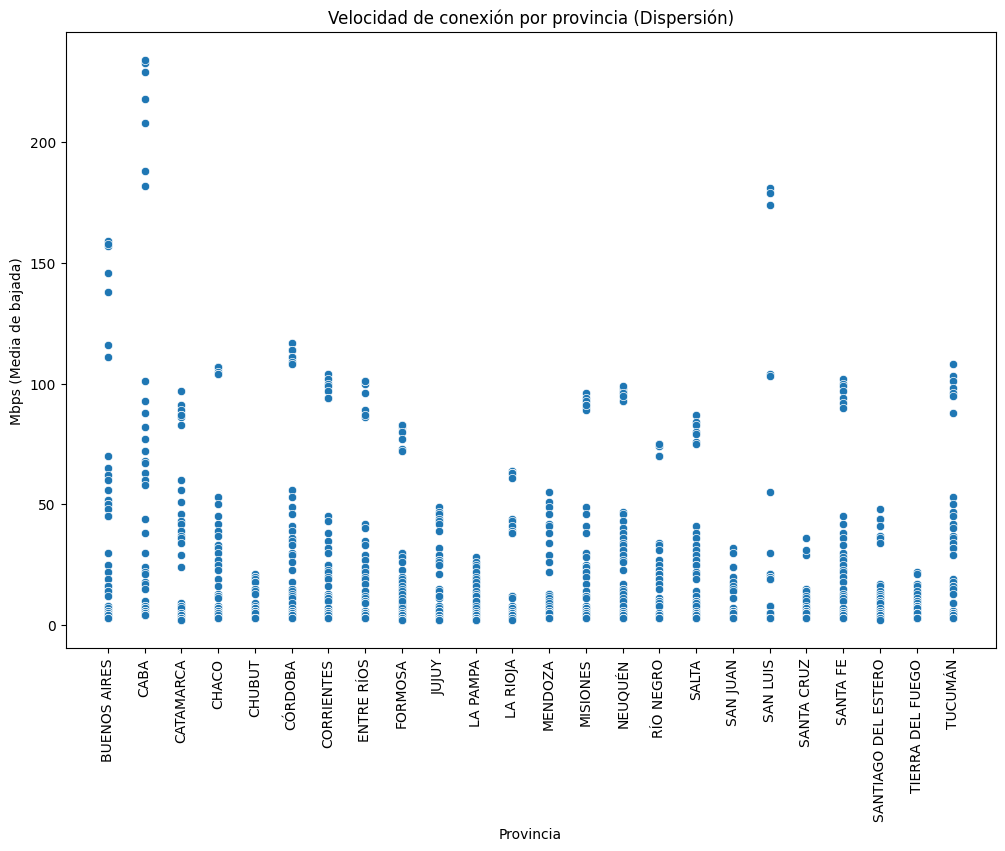

In [69]:
# Gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Provincia', y='Mbps (Media de bajada)', data=df)
plt.xticks(rotation=90)
plt.title('Velocidad de conexión por provincia (Dispersión)')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.show()

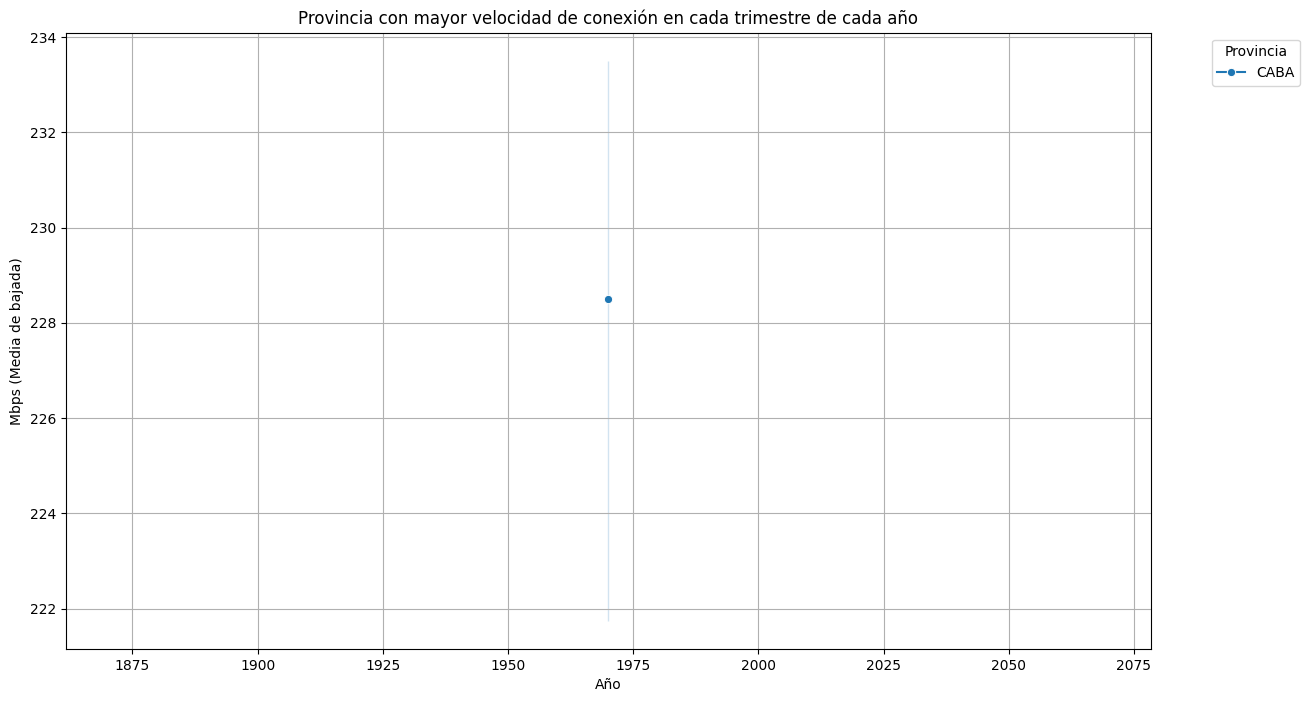

In [70]:
# Filtrar el DataFrame para obtener la provincia con mayor velocidad en cada trimestre de cada año
df_max_speed = df.loc[df.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].idxmax()]

# Crear la gráfica de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_max_speed, x='Año', y='Mbps (Media de bajada)', hue='Provincia', marker='o')
plt.title('Provincia con mayor velocidad de conexión en cada trimestre de cada año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14416\2680266470.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Incremento_Velocidad', y='Provincia', data=top_10_provincias, ci=None)


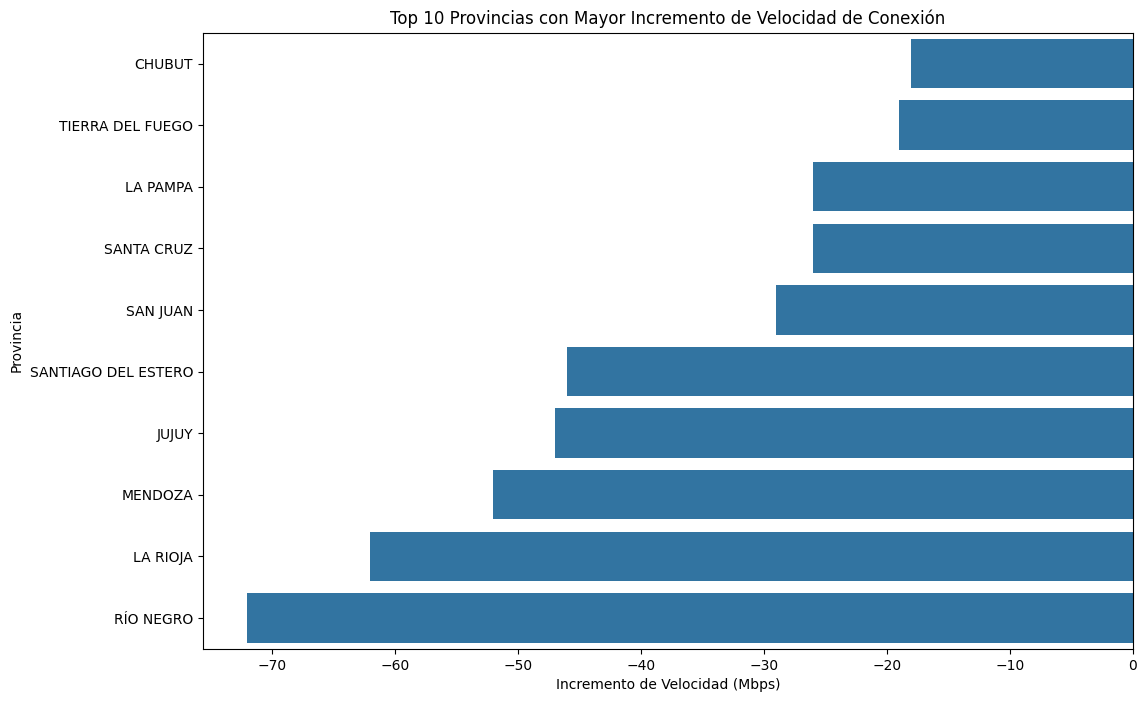

In [71]:
# Calcular el incremento de velocidad para cada provincia
df['Incremento_Velocidad'] = df.groupby('Provincia')['Mbps (Media de bajada)'].diff()

# Filtrar las filas con valores nulos en 'Incremento_Velocidad'
df_incremento = df.dropna(subset=['Incremento_Velocidad'])

# Calcular el incremento total de velocidad para cada provincia
incremento_total = df_incremento.groupby('Provincia')['Incremento_Velocidad'].sum().reset_index()

# Seleccionar las diez provincias con el mayor incremento de velocidad
top_10_provincias = incremento_total.nlargest(10, 'Incremento_Velocidad')

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Incremento_Velocidad', y='Provincia', data=top_10_provincias, ci=None)
plt.title('Top 10 Provincias con Mayor Incremento de Velocidad de Conexión')
plt.xlabel('Incremento de Velocidad (Mbps)')
plt.ylabel('Provincia')
plt.show()

In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int32  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   int64  
 4   Incremento_Velocidad    984 non-null    float64
 5   Trimestre_Label         1008 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 43.4+ KB
None


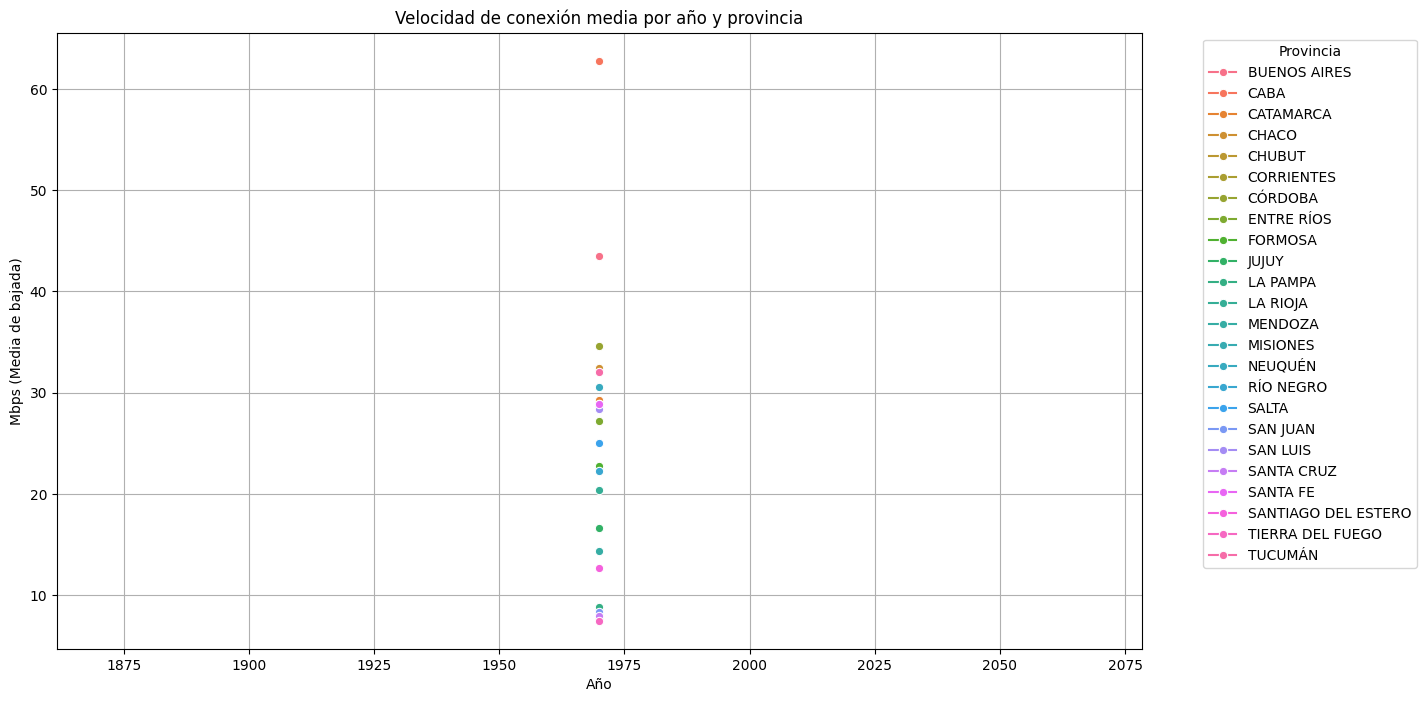

In [73]:
# Agrupar los datos por año y provincia y calcular la media de las velocidades de bajada
df_grouped = df.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().reset_index()

# Crear la gráfica de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped, x='Año', y='Mbps (Media de bajada)', hue='Provincia', marker='o')
plt.title('Velocidad de conexión media por año y provincia')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [74]:
print(df.head())

    Año  Trimestre     Provincia  Mbps (Media de bajada)  \
0  1970          2  BUENOS AIRES                     157   
1  1970          2          CABA                     233   
2  1970          2     CATAMARCA                      97   
3  1970          2         CHACO                     107   
4  1970          2        CHUBUT                      21   

   Incremento_Velocidad Trimestre_Label  
0                   NaN              Q2  
1                   NaN              Q2  
2                   NaN              Q2  
3                   NaN              Q2  
4                   NaN              Q2  


In [75]:
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Velocidad % por prov.csv


# Análisis Exploratorio de Datos (EDA) - Velocidad de Conexión a Internet por Provincia

## Introducción

Este proyecto se centra en el análisis de la velocidad de conexión a internet en diferentes provincias de Argentina. Los datos provienen del **Ente Nacional de Comunicaciones (ENACOM)**, el organismo regulador de las telecomunicaciones en el país.

## Descripción del Conjunto de Datos

El conjunto de datos utilizado en este análisis contiene información sobre la distribución porcentual de la velocidad de conexión a internet por provincia. Esto permite analizar el acceso a diferentes velocidades en distintas partes del país.

## Objetivo del Análisis

El propósito de este análisis es estudiar la variabilidad de velocidades de conexión en cada provincia, identificando regiones con mejor o peor acceso a internet de alta velocidad.

## Contenido del Notebook

1. **Carga y Normalización de Datos**
    - Carga del archivo CSV y verificación de su existencia.
    - Normalización de nombres de columnas y valores específicos.

2. **Análisis Exploratorio de Datos (EDA)**
    - Estadísticas descriptivas y análisis exploratorio.
    - Visualización de histogramas y mapas de calor de correlación.
    - Análisis de tablas de contingencia para columnas no numéricas.
    - Cálculo de Z-scores y visualización de valores atípicos.

3. **Visualización de Datos**
    - Gráficos de barras, dispersión y boxplots para analizar la distribución de la velocidad de conexión por provincia.
    - Gráficas de líneas para visualizar la provincia con mayor velocidad en cada trimestre de cada año.
    - Análisis del incremento de velocidad para cada provincia y visualización de las diez provincias con mayor incremento.

4. **Análisis de Distribuciones y Multicolinealidad**
    - Cálculo de skewness y kurtosis para columnas numéricas.
    - Verificación de la existencia de multicolinealidad entre variables numéricas utilizando el Factor de Inflación de la Varianza (VIF).

5. **Agrupamiento y Análisis de Duplicados**
    - Agrupamiento de datos por categorías y cálculo de estadísticas descriptivas.
    - Verificación y conteo de filas duplicadas en el DataFrame.

## Requisitos

- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Sweetviz
- Skimpy
- Scipy
- Statsmodels
- OS

## Cómo Ejecutar el Notebook

1. Clona este repositorio en tu máquina local.
2. Asegúrate de tener instaladas todas las dependencias necesarias.
3. Coloca el archivo CSV en la ruta especificada en el notebook.
4. Ejecuta las celdas del notebook en orden para reproducir el análisis.

## Conclusiones

Este análisis proporciona una visión detallada de la variabilidad de la velocidad de conexión a internet en diferentes provincias de Argentina. Las visualizaciones y estadísticas descriptivas ayudan a identificar regiones con mejor o peor acceso a internet de alta velocidad, así como a entender las tendencias y patrones en los datos.

## Autor

- [Tu Nombre]

## Licencia

Este proyecto está bajo la Licencia MIT. Consulta el archivo [LICENSE](LICENSE) para más detalles.